# Logistic Regression

[Click here](https://neuronjolt.com/data/downloads/ch_06_logistic_regression.ipynb) to download this chapter as a Jupyter (.ipynb) file. 

## Module and Function Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from plotnine import *
import seaborn as sns

**Set an option to prevent scientific notation when numbers are displayed***

In [2]:
# Set print options to suppress scientific notation
np.set_printoptions(suppress=True, precision=4)

## Introducing Logistic Regression

Like linear regression, logistic regression is an approach to modeling the relationship between one or more ***independent variables*** (also called explanatory variables), typically denoted as x, and a ***dependent variable*** denoted as y, with a linear function. The difference between them is that, with logistic regression, the dependent variable is a categorical variable rather than a continuous numeric variable. For example, we might use logistic regression to predict whether a field goal in football is made or missed based on the distance of the kick. In this scenario, the dependent variable is a category that only takes two values, make or miss. Linear regression only works well when the dependent variable is a continuous variable, so for predicting field goals we need to use logistic regression instead. There are many business situations where the dependent variable is categorical and logistic regression would be an appropriate analysis method. For example, we might want to predict whether a customer will respond to an offer, whether an employee will leave the company, or whether a prospective borrower will default on a loan.

Notice that in all the situations we have described so far the dependent variable is categorical and binary (has only two outcomes). The type of logistic regression we can use to model these scenarios is called ***binary logistic regression*** or ***simple logistic regression***. There is another type of logistic regression that can model scenarios in which the dependent variable is categorical and has more than 2 possible values. That type of logistic regression is called ***multinomial logistic regression***. There is yet another type of logistic regression called ***ordered logistic regression*** that is used when there are three or more categorical outcomes and they have an inherent ordering to them (for example, predicting a customer's rating: very negative, negative, neutral, positive, very positive). This chapter will focus on binary logistic regression.

The linear model for linear regression produces a number that is used as the prediction, but binary logistic regression is used to predict a binary category. So, a question you might be asking yourself is how the number calculated by the logistic regression equation can be used to produce a binary prediction. Let's take a look at the conceptual model for logistic regression to see how it works.

## Conceptual Model for Logistic Regression

The conceptual linear regression model expresses the relationship that is assumed to exist *in the population* between $n$ independent variables $x_{i,1}$ to $x_{i,n}$ and the dependent variable, which representes the ***natural log of the odds that the dependent variable has the positive class***. Let us introduce some new terminology here. When a dependent variable is categorical, the values it can take are often referred to as the ***outcome classes***. We can arbitrarily designate one of the outcome classes as the ***positive class***:  

$$\ln\left(\frac{p}{1-p}\right)=\beta_{0}+\beta_{1}x_{i,1}+\beta_{2}x_{i,2}+\ldots+\beta_{n}x_{i,n}$$  

In this equation $p$ represents the probability of the dependent variable being the positive class.

As with linear regression, it is important to emphasize that the conceptual model represents the relationship between the independent variables and the dependent variable that exists in the population. Since we typically do not have access to all the individual cases in a population we estimate the linear regression model based on a sample drawn from the population. This estimate of the model is called the ***logistic regression equation*** and is described in the next section. 

## Logistic Regression Equation

The logistic regression procedure estimates the logistic regression model by finding the $\beta$ terms for the equation that provide the best "fit" with the observed data in the sample.

When we run a linear regression procedure to create a specific regression model the equation produced as a result is typically written as:  
$$\ln\left(\frac{p}{1-p}\right)=b_{0}+b_{1}x_{i,1}+b_{2}x_{i,2}+\ldots+b_{n}x_{i,n}$$  



In this equation, the ***natural log of the odds that the target variable has the positive class***, $\ln\left(\frac{p}{1-p}\right)$, is calculated as the weighted linear combination of the $x_{i,n}$ terms (the independent variables). The $b_{n}$ terms are called the ***coefficients***. $b_{1}$ to $b_{n}$ are the ***weights*** on each of the independent variables, and $b_{0}$ is a constant called the ***intercept***.

If the probability of an event is $p$, the ***odds*** of the event is the ratio of the probabability of an event occurring to the the probability of the event not occurring. With binary events, if the probability of an event occurring is $p$ then the probability of the event not occurring is $1-p$, since the event either occurs or it does not. Thus the odds of an event may be expressed as $\frac{p}{1-p}$. Odds are always non-negative, so in order to permit the right side of the equation to produce any real number, positive or negative, the natural log of the odds of the event is used on the left side.

The form of the logistic regression equation that has the log odds on the left side is called the "logit form" of the logistic regression equation, because another name for the $\ln(\frac{p}{1-p})$ function is the "logit" function.

So, why is the number produced by the logistic regression equated to the natural logarithm of the odds that the target variable is the positive class and not simply to the probability that the target variable is of the positive class? One reason is that the logit function can form reasonably linear relationships with the $x$ variables.

Another reason is that the number produced by the right side of the logistic regression equation can be any real number. In logistic regression those real numbers are converted to a number between 0 and 1 that can be interpreted as a probability estimate that the observation belongs to the positive class. The function that does the conversion is the ***logistic*** function, also called the ***sigmoid function*** or the ***logistic sigmoid function***. This function maps any real number to a number between 0 and 1. The logistic function is defined as $$\sigma(z) = \frac{1}{1 + e^{-z}}$$ where $e$ is a constant and $z$ is the real number produced by the regression equation. 

The logistic function is plotted below. Note how it maps real number inputs on the x-axis to a number between 0 and 1 on the y-axis.

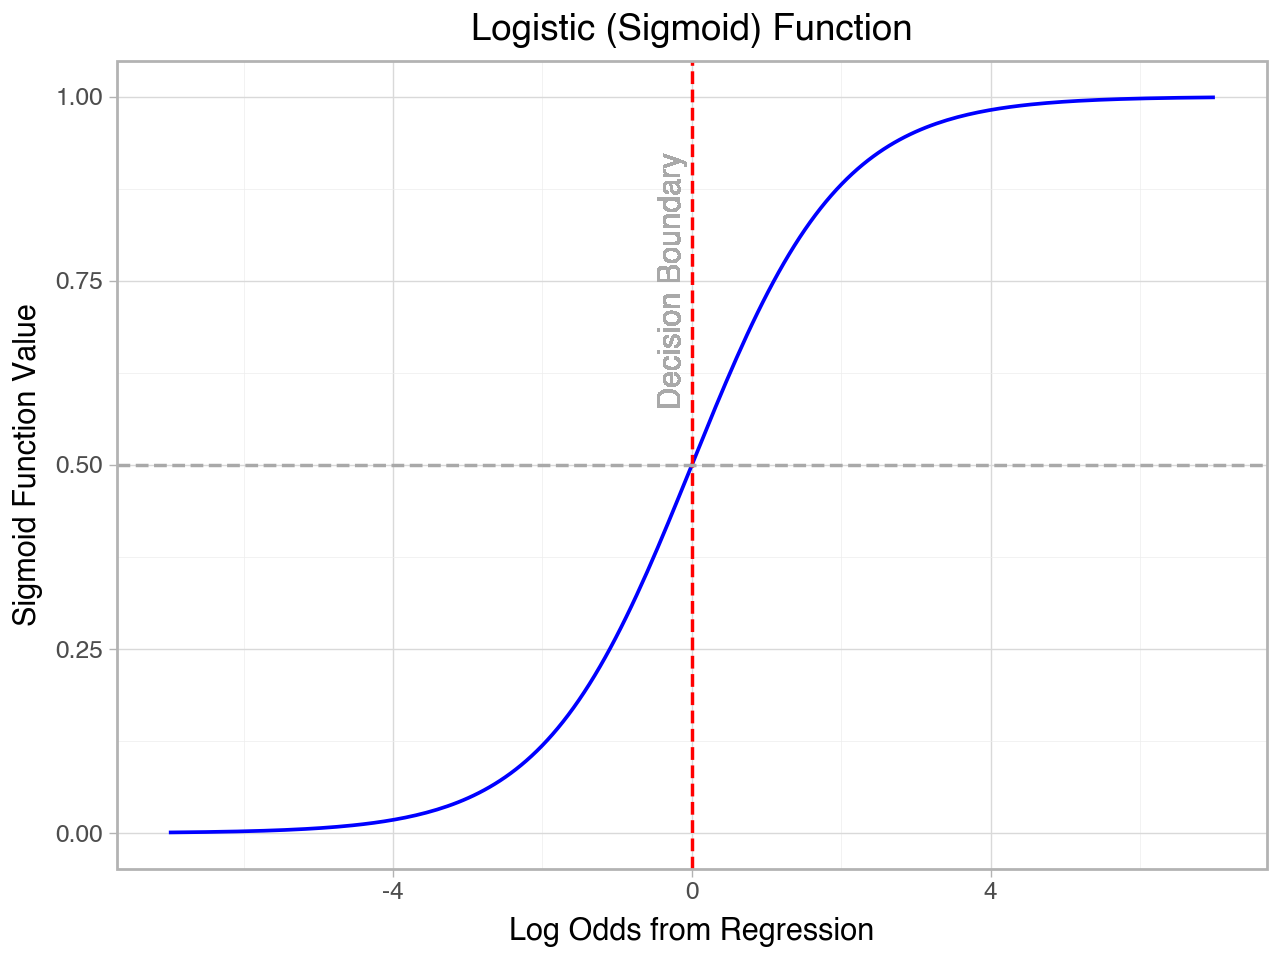

In [114]:
# Generate values for log odds (output of logistic regression function)
values = np.linspace(-7, 7, 200)

sigmoid = pd.DataFrame({
    'values': np.linspace(-7, 7, 200),
    'logistic': 1 / (1 + np.exp(-1 * values))
})

(
    ggplot(data = sigmoid, mapping = aes(x = 'values', y = 'logistic'))
    + geom_line(color = 'blue', size = 0.75)
    + geom_vline(xintercept = 0, color = 'red', linetype = '--', size = 0.70)
    + geom_hline(yintercept = 0.5, color = 'darkgray', linetype = '--', size = 0.70)
    + theme_light()
    + geom_text(mapping = aes(x = -0.25, y = 0.75),
                label = "Decision Boundary",
                angle = 90,
                color = "darkgray") 
    + labs(title = 'Logistic (Sigmoid) Function',
           x = 'Log Odds from Regression',
           y = 'Sigmoid Function Value')
)

The general prediction formula for logistic regression predicts whether the observation is of the positive class (True) or not (False). If the value of the logistic regression equation is greater than 0 the prediction is True (i.e. the observation is a member of the positive class). We use the logistic function to translate the result of the logistic regression equation into a number between 0 and 1. This can be interpreted as the probability of belonging to the positive class. The logistic function applied to 0 results in a value of 0.50. So, if the logistic regression equation yields a number greater than 0 the estimated probability of the observation belonging to the positive class is greater than 0.50, so we predict that observation to be a member of the positive class.

The prediction relies on the threshold 0.50. It is worth noting here that since the probabilities derived from the logistic regression equation are only estimated probabilities, we sometimes adjust this threshold and observe its effect on model performance. For example, we might decide to classify an observation as a member of the positive class if the logistic regression equation yields an estimated probability of membership in the positive class of 0.40 or greater, or 0.60 or greater.

Another way to express the logistic regression equation, called the "logistic form" because it uses the logistic sigmoid function, directly models the probability of the positive class:

$$p = \frac{1}{1 + e^{-(b_{0}+b_{1}x_{i,1}+b_{2}x_{i,2}+\ldots+b_{n}x_{i,n})}}$$

The important thing for users of logistic regression is that we can easily transform the number calculated by the right side of the logit form of the logistic regression equation into a probability. We first get the odds by taking the exponential of the logit (the logit is the number produced by the logistic regression equation):
$$odds = e^{\ln\left(\frac{p}{1-p}\right)}$$
Then, to calculate the probability of the positive class, we can divide the odds by 1 plus the odds: $$p = \frac{odds}{1+odds}$$

Another approach for converting the log odds to probabilities is to use the logistic sigmoid function directly. With that approach we would use the following equation:

$$p = \frac{1}{1 + e^{-z}}$$

where $e$ is a constant (the base of the natural logarithm function; approximately 2.71828) and $z$ is the real number produced by the regression equation: $\ln\left(\frac{p}{1-p}\right)$

### The Objective Function for Logistic Regression

Recall that OLS linear regression finds the coefficients that result in the lowest sum of squared errors. The objective function for logistic regression works differently. The objective function for logistic regression causes it to find the values for the coefficients that result in the predicted probabilities matching the observed data as closely as possible. Here’s how it works. For each observation, the ***probability of the actual outcome class*** is calculated. The probability of the positive class is calculated as the result of applying the logistic sigmoid function to the number produced by the logistic regression equation. The probability of the negative class is calculated as 1 - the probability of the positive class. 

The table below demonstrates how the probability of the actual class is calculated:

| Actual class | Log Odds of Positive Class| P(Positive Class) | P(Actual Class) | **log(P(Actual Class))** | **-1*log(P(Actual Class))** |
| -------- | ------- | -------- | ------- | ------- |  ------- |
| 0  | -2.140    | 0.105  | 0.895    | -0.111 | **0.111** |
| 1 | 2.371     | 0.915  | 0.915    | -0.089 | **0.089**|
| 1    | 0.235    | 0.558  | 0.558| -0.583 | **0.583** |
| 1    | 2.483    | 0.923  | 0.923    | -0.080 | **0.080** |

After calculating the probability of the actual class for each instance the product of the probabilities is considered the overall likelihood of the observed data under the current model. For numeric stability, however, the log-likelihood (the natural log of the likelihood) is typically calculated. To calculate the log likelihood the logarithms of the probabilities are taken and these are then summed. Logistic regression finds the coefficients that result in the maximum log-likelihood. This means finding the coefficients that make the observed data as probable as possible under the model. This is done using an optimization algorithm, typically gradient descent, which minimizes the negative log-likelihood. This is mathematically equivalent to maximizing the log-likelihood, but in optimization minimization problems are typically easier to solve. The optimization algorithm iteratively adjusts the coefficients to increase the likelihood of the observed outcomes. ***In essence, the optimization function in logistic regression adjusts the coefficients to make the model’s predictions as consistent as possible with the actual observed outcomes***
. This is achieved by maximizing the log-likelihood. This type of optimization is called ***maximum likelihood***.

## Logistic Regression with Statsmodels

### Load Data

We will use a subset of the *Titanic* dataset to investigate logistic regression. This dataset has information on passengers on the titanic, including whether they survived the disaster or not. We will use survival status as the dependent variable and see if we can predict whether the passenger survived based on their age, sex, class of ticket they purchased, and the price of their ticket. The variable `pclass` represents the class of the ticket. notice that the classes are expressed as integers. To prevent statsmodels from treating this as a numeric variable we use the `pd.Categorical()` function to transform it into a variable with type category.

In [56]:
titanic = sns.load_dataset('titanic')
titanic = titanic.loc[:, 'survived pclass sex age'.split()].dropna()
titanic['pclass'] = pd.Categorical(titanic['pclass'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  714 non-null    int64   
 1   pclass    714 non-null    category
 2   sex       714 non-null    object  
 3   age       714 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 23.1+ KB


### Specify and Fit the Model

We use the `smf.logit()` function to specify the logistic regression model. In the formula we indicate that in our model the `survived` variable is to be predicted by the `age`, `sex`, and `pclass` variables. We apply the model's `fit()` method to produce a results object. Finally, we use the `summary()` method of the results object to print out the results of the logistic regression analysis.

In [57]:
model = smf.logit(formula = 'survived ~ age + sex + pclass', data = titanic).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.3289
Time:                        12:56:10   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7770      0.401      9.416      0.000       2.991       4.563
sex[T.male]    -2.5228    

The following table explains elements in the logistic regression results summary:

| Element                  | Explanation |
|--------------------------|------------|
| **Pseudo R-squared**    | A measure of goodness-of-fit. Values closer to 1 suggest a better fit, but this $R^2$ is not interpreted in the same way as the $R^2$ for linear regression. |
| **Log-Likelihood**      | The log of the likelihood function at the estimated parameters (higher values indicate a better fit). |
| **LL-Null**            | Log-likelihood of the null model (model with only an intercept). Comparing this to the Log-Likelihood of the fitted model helps assess the model's improvement over the null model. |
| **LLR p-value**        | P-value for the likelihood ratio test (tests if the model is significantly better than the null model). |
| **coef**               | Estimated coefficients for each predictor variable. These coefficients represent the effect of each predictor on the log-odds of the outcome variable. A positive coefficient means an increase in the predictor increases the odds of the outcome, and a negative coefficient means it decreases the odds. |
| **P>\|z\|**                       | The p-value for hypothesis test with null hypothesis that true coefficient in the population is zero (no relationship between the independent and dependent variable). If p-value is less than a pre-determined threshold, typically 0.05, we say that the independent variable has a statistically-significant association with the dependent variable. |
| **[0.025  0.975]**     | 95% confidence interval for each coefficient estimate. We are 95% confident that the true coefficient for this independent variable in the population is between these two numbers. |


### Examine the Marginal Effects Table

Because the coefficients produced by the logistic regression model are log odds they are difficult to interpret. They may also be somewhat misleading, as a large change in the odds may reflect only a small change in probability. The marginal effects table expresses the coefficients in terms of probabilities, which are easier to interpret. The coefficients in the Marginal Effects Table express ***the change in the predicted probability of the outcome variable for a one-unit change in each predictor variable***, when the other variables are held constant. 

In [60]:
mfx = model.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:               survived
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[T.male]    -0.3674      0.016    -22.732      0.000      -0.399      -0.336
pclass[T.2]    -0.1908      0.038     -4.955      0.000      -0.266      -0.115
pclass[T.3]    -0.3758      0.033    -11.341      0.000      -0.441      -0.311
age            -0.0054      0.001     -5.097      0.000      -0.007      -0.003


Note that for a categorical independent variable, the coefficient is interpreted in reference to the category which is not shown, which is considered the reference category. For the `sex` variable, female is not shown, so female is the reference category. For the `pclass` variable the base category is class 1, since it isn't shown in the summary. So, from the Marginal Effects Table we can see that being male lowers the probability of survival by 0.3674 compared to being female, and having a second-class ticket lowers the probability of survival by 0.191, compared to having a first-class ticket. Having a third-class ticket lowers the probability of survival by 0.376, compared to having a first-class ticket. 

### Viewing the prediction table ("Confusion Matrix")

This table shows a 2-dimensional array. The row indexes represent the actur class and the column labels represent the predicted class. So, for example, the number 356 at row index 0 and column index 0 indicates that there were 356 passengers who did not survive for whom the model predicted they would not survive.

In [21]:
model.pred_table(threshold = 0.5)

array([[356.,  68.],
       [ 83., 207.]])

We can verify the numbers from the prediction table with some calculations.

In [63]:
# Counts of actual survival status
titanic['survived'].value_counts()

survived
0    424
1    290
Name: count, dtype: int64

In [64]:
# Total count of model predict survive
(model.predict(titanic) >= 0.50).sum()

275

In [67]:
# Count of model predict survive and did survive
((model.predict(titanic) >= 0.50) & (titanic['survived'] == 1)).sum()

207

### Making Predictions for New Data

We can use the results object's `predict()` method to make new predictions. The numbers produced are the probabilities of the positive class, by default.

In [79]:
new_data = pd.DataFrame({'pclass': [3, 1, 3, 2],
                         'sex': ['male', 'female', 'male', 'female'],
                         'age': [12, 5, 65, 49]})

new_data["predicted_prob"] = model.predict(new_data)  

print(new_data)

   pclass     sex  age  predicted_prob
0       3    male   12        0.145515
1       1  female    5        0.973197
2       3    male   65        0.023421
3       2  female   49        0.658122


We can also set the `which` parameter of the `predict()` method to 'linear' to configure the `predict` method to return the log odds instead of the probabilities.

In [83]:
model.predict(new_data, which = 'linear')

0   -1.770217
1    3.592086
2   -3.730436
3    0.654935
dtype: float64

Below we convert the log odds to a probability, just to verify.

In [87]:
1 / (1 + np.exp(-(model.predict(new_data, which = 'linear'))))

0    0.145515
1    0.973197
2    0.023421
3    0.658122
dtype: float64